#  Big Data Tools and Techniques Mining Financial, Operational and Social Network Data     TERM PROJECT

In [321]:
%matplotlib inline
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 6))
import pandas.io.data as web
from matplotlib.pyplot import scatter,xlabel,ylabel,savefig
import statsmodels.api as sm
from datetime import datetime

In [329]:
aapl = web.get_data_google('AAPL', '2012-04-01')
aapl['Rows'] = (aapl.index - datetime.strptime('2012-04-01',date_format)).days
msft = web.get_data_google('MSFT', '2012-04-01')
msft['Rows'] = (msft.index - datetime.strptime('2012-04-01',date_format)).days

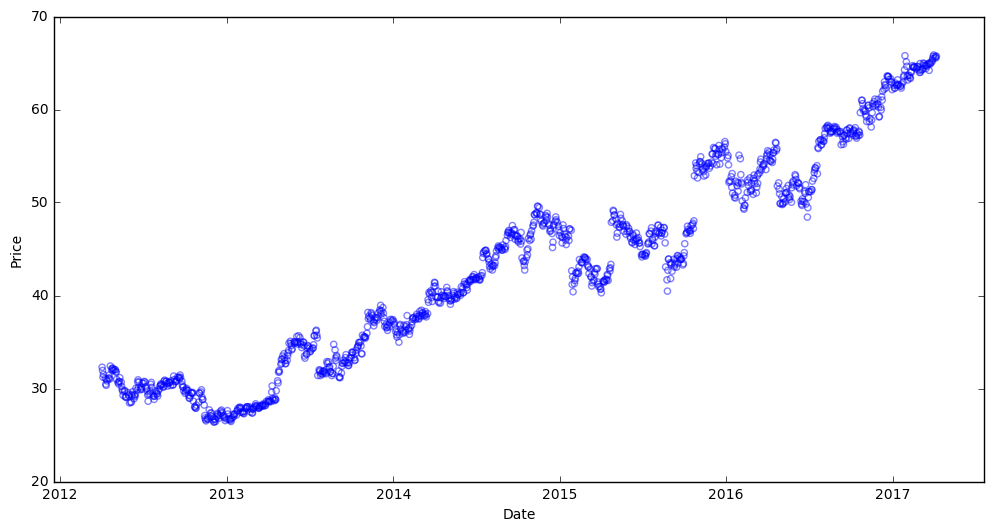

In [330]:
scatter(msft.index,msft.Close,marker='o',edgecolor='b',facecolor='none',alpha=0.5)
xlabel('Date')
ylabel('Price')
savefig('Microsoft.png',fmt='png',dpi = 100)

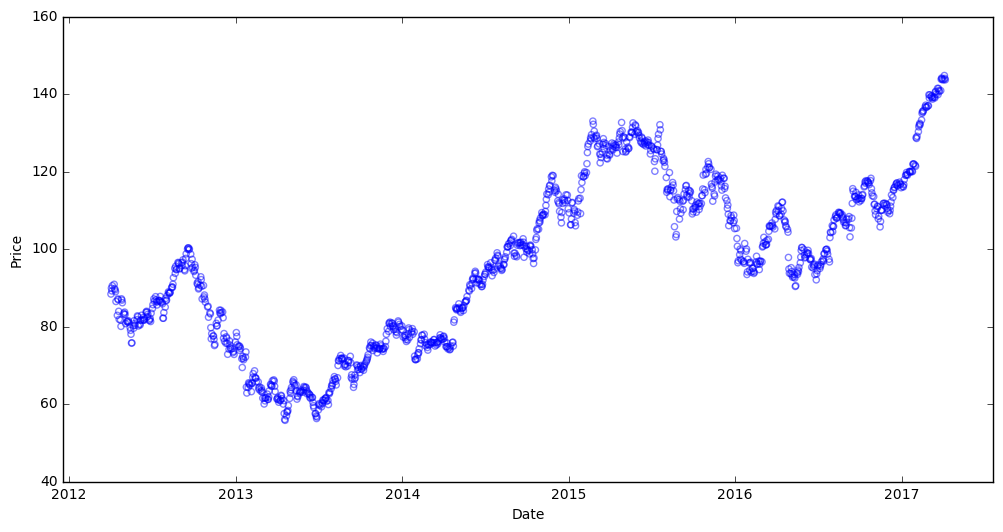

In [331]:
scatter(aapl.index,aapl.Close,marker='o',edgecolor='b',facecolor='none',alpha=0.5)
xlabel('Date')
ylabel('Price')
savefig('APPLE.png',fmt='png',dpi = 100)

In [332]:
date_format = "%Y-%m-%d"
yaapl = aapl.Close
Xaapl= aapl['Rows']
Xaapl = sm.add_constant(Xaapl)
estaapl = sm.OLS(yaapl, Xaapl).fit()
estaapl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     1487.
Date:                Fri, 07 Apr 2017   Prob (F-statistic):          1.61e-215
Time:                        01:17:33   Log-Likelihood:                -5165.4
No. Observations:                1262   AIC:                         1.033e+04
Df Residuals:                    1260   BIC:                         1.035e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         69.1448      0.818     84.573      0.000        67.541    70.749
Rows           0.0298      0.001     38.566      0.000         0.028     0.031
==============================================================================
Omnibus:                      570.188   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.713
Skew:                           0.251   Prob(JB):                     4.90e-18
Kurtosis:                       1.876   Cond. No.                     2.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Populating the interactive namespace from numpy and matplotlib


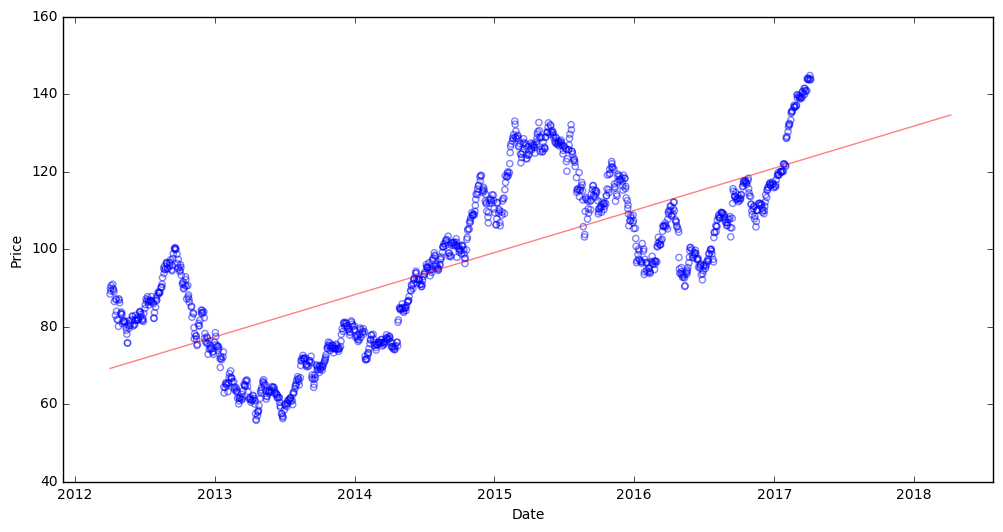

In [334]:
%pylab inline
plt.rc('figure', figsize=(12, 6))
Xaaplpred = Xaapl.copy()
#print Xaaplpred.xs(datetime.date(2016, 1, 26))
daterange = pd.date_range(datetime.datetime.now(), datetime.datetime.now() + datetime.timedelta(days=365))
for d in daterange:
    Xaaplpred.loc[d.date()]= [1,(d - datetime.datetime.strptime('2012-04-01',date_format)).days]
yaaplpred = estaapl.predict(Xaaplpred)
scatter(aapl.index,aapl.Close,marker='o',edgecolor='b',facecolor='none',alpha=0.5)
xlabel('Date')
ylabel('Price')
savefig('APPLE.png',fmt='png',dpi = 100)
plt.plot(Xaaplpred.index, yaaplpred, 'r', alpha=0.5)  # Add the regression line

In [335]:
ymsft = msft.Close
Xmsft= msft['Rows']
Xmsft = sm.add_constant(Xmsft)
estmsft = sm.OLS(ymsft, Xmsft).fit()
estaapl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     1487.
Date:                Fri, 07 Apr 2017   Prob (F-statistic):          1.61e-215
Time:                        01:18:26   Log-Likelihood:                -5165.4
No. Observations:                1262   AIC:                         1.033e+04
Df Residuals:                    1260   BIC:                         1.035e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         69.1448      0.818     84.573      0.000        67.541    70.749
Rows           0.0298      0.001     38.566      0.000         0.028     0.031
==============================================================================
Omnibus:                      570.188   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.713
Skew:                           0.251   Prob(JB):                     4.90e-18
Kurtosis:                       1.876   Cond. No.                     2.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

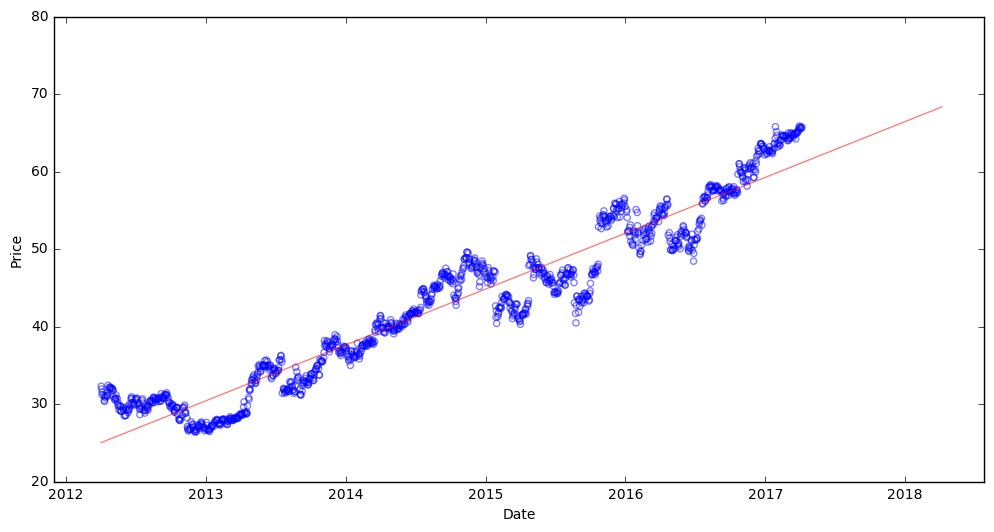

In [336]:
Xmsftpred = Xmsft.copy()
#print Xmsftpred.xs(datetime.date(2016, 1, 26))
daterange = pd.date_range(datetime.datetime.now(), datetime.datetime.now() + datetime.timedelta(days=365))
for d in daterange:
    Xmsftpred.loc[d.date()]= [1,(d - datetime.datetime.strptime('2012-04-01',date_format)).days]
ymsftpred = estmsft.predict(Xmsftpred)
scatter(msft.index,msft.Close,marker='o',edgecolor='b',facecolor='none',alpha=0.5)
xlabel('Date')
ylabel('Price')
savefig('Microsoft.png',fmt='png',dpi = 100)
plt.plot(Xmsftpred.index, ymsftpred, 'r', alpha=0.5)  # Add the regression line

In [338]:
#import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot

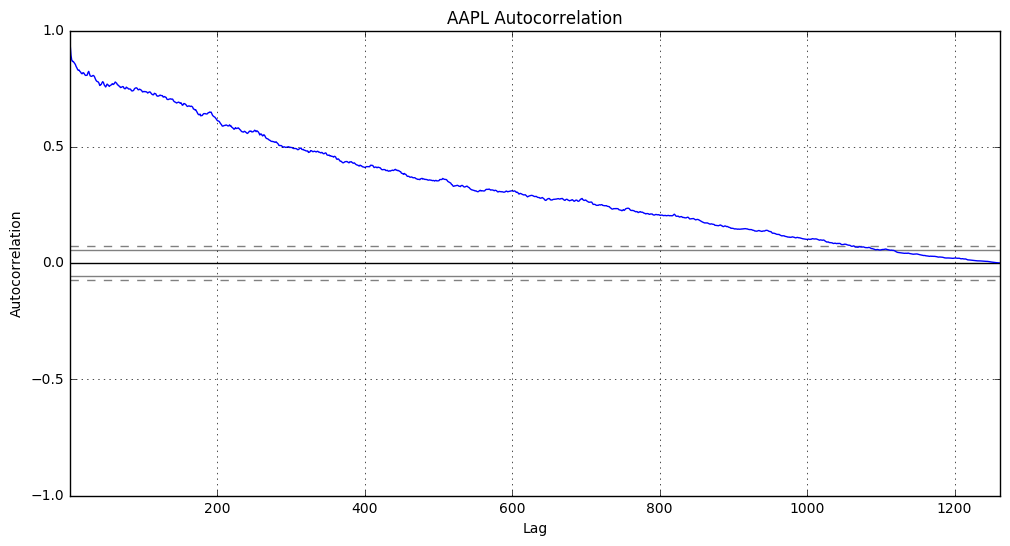

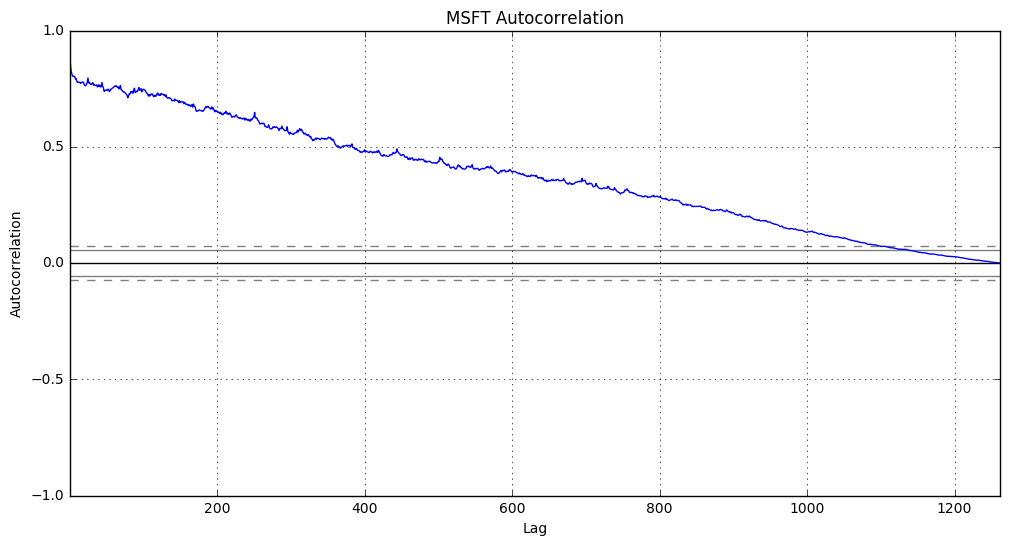

In [339]:
# Plot the auto-correlation graph for each stock using Pandas' autocorrelation_plot() function
plt.figure()
autocorrelation_plot(aapl)
plt.title('AAPL Autocorrelation')
plt.figure()
autocorrelation_plot(msft)
plt.title('MSFT Autocorrelation')
plt.figure()
plt.show()

(array([-1261, -1260, -1259, ...,  1259,  1260,  1261]),
 array([ 0.001 ,  0.0021,  0.0031, ...,  0.0031,  0.0021,  0.001 ]),
 <matplotlib.lines.Line2D at 0x23c88c88>)

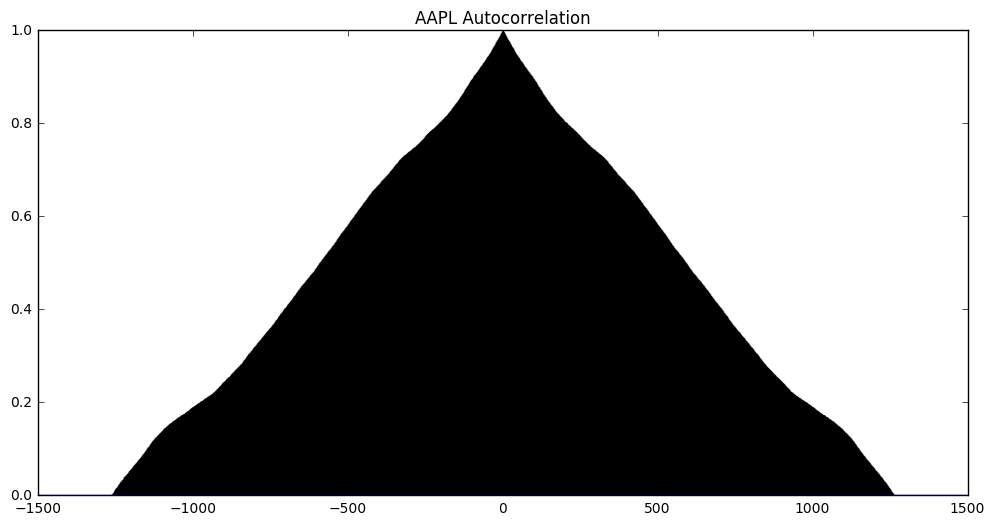

In [355]:
# An alternative way of plotting correlation using matplotlib instead:
plt.title('AAPL Autocorrelation')
plt.acorr(aapl.Close, maxlags=len(aapl)-1)
# This plot will look different from the one generated by Pandas because:
#   (1) the correlation is calculated relative to 0 rather than to the average of the data
#   (2) the lag is shown from -1200 to 1200 rather than 0 to 1200


(array([-1261, -1260, -1259, ...,  1259,  1260,  1261]),
 array([ 0.0009,  0.0017,  0.0025, ...,  0.0025,  0.0017,  0.0009]),
 <matplotlib.lines.Line2D at 0x240a9b00>)

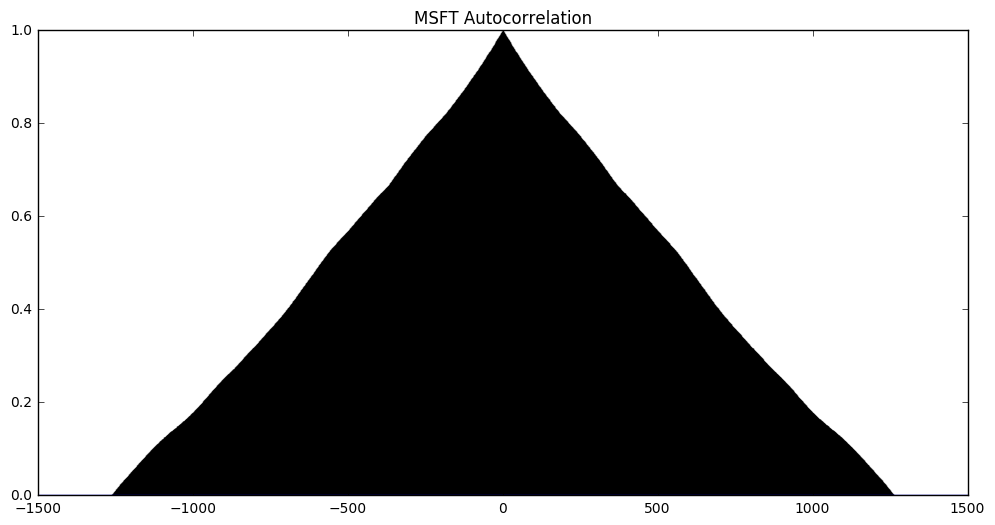

In [356]:
plt.title('MSFT Autocorrelation')
plt.acorr(msft.Close, maxlags=len(aapl)-1)

In [37]:
# All stocks are highly autocorrelated.  This is to be expected because yesterday's stock price
# gives you a lot of insight into today's: it's likely very close.  If they weren't autocorrelated
# that would mean that the prices jump all over the place from day to day: $5 one day, $47 the next,
# $0.02 the day after that.

### Task 3: "Calculate the monthly return over the period for each stock using the “shift trick” on the page titled Shifting in the Working with Time Series in Pandas deck"

In [428]:
# Resampling the data to get end of business month data points
aapl_monthend = aapl.Close.resample('BM').last()
msft_monthend = msft.Close.resample('BM').last()
Xaapl_monthend = Xaapl.resample('BM').last()
Xmsft_monthend = Xmsft.resample('BM').last()
# Check to make sure we got what we expected
#aapl_monthend

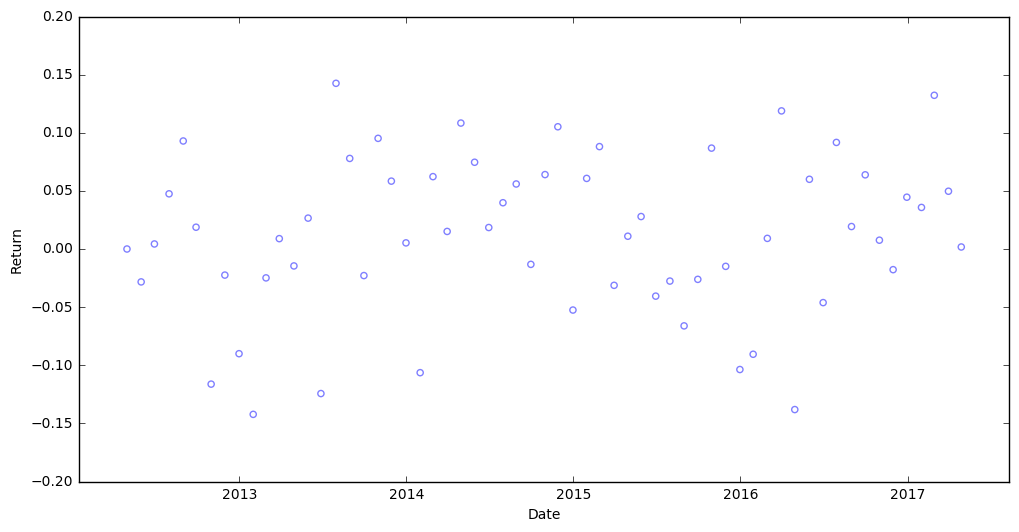

In [422]:
# calculating monthly returns for each stock
aapl_returns = aapl_monthend / aapl_monthend.shift(1) - 1
aapl_returns.name = 'AAPL'
aapl_returns.loc[datetime.date(2012,4,30)] = 0
scatter(aapl_returns.index,aapl_returns,marker='o',edgecolor='b',facecolor='none',alpha=0.5)
xlabel('Date')
ylabel('Return')
savefig('APPLE Return.png',fmt='png',dpi = 100)

#aapl_returns

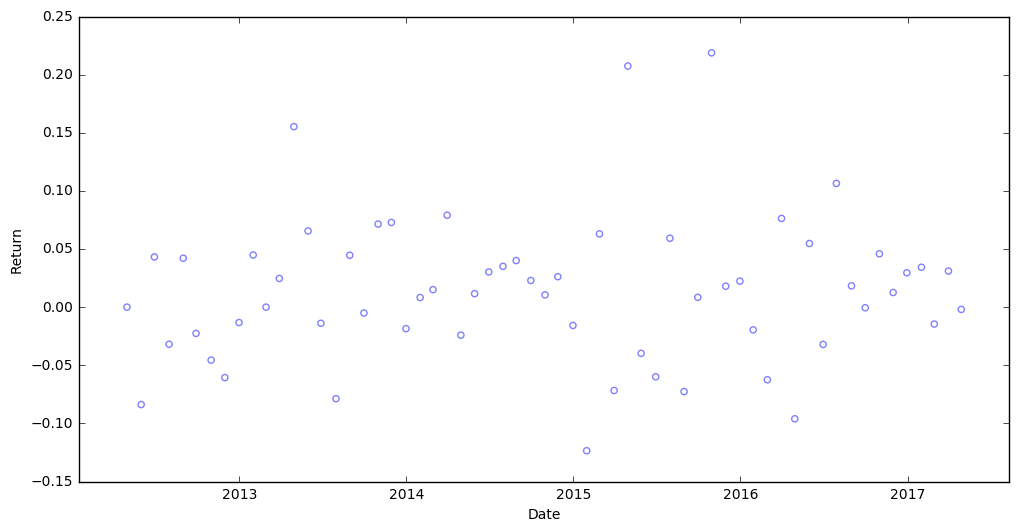

In [423]:
msft_returns = msft_monthend / msft_monthend.shift(1) - 1
msft_returns.name = 'MSFT'
#msft_returns
msft_returns.loc[datetime.date(2012,4,30)] = 0
scatter(msft_returns.index,msft_returns,marker='o',edgecolor='b',facecolor='none',alpha=0.5)
xlabel('Date')
ylabel('Return')
savefig('Microsoft Return.png',fmt='png',dpi = 100)

In [424]:
# print aapl_returns
estaaplreturn = sm.OLS(aapl_returns , Xaapl_monthend).fit()
# Check the results
estaaplreturn.summary()
#estaapl.params


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   AAPL   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9351
Date:                Fri, 07 Apr 2017   Prob (F-statistic):              0.337
Time:                        03:08:04   Log-Likelihood:                 77.879
No. Observations:                  61   AIC:                            -151.8
Df Residuals:                      59   BIC:                            -147.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0040      0.018     -0.223      0.824        -0.040     0.032
Rows        1.588e-05   1.64e-05      0.967      0.337      -1.7e-05  4.87e-05
==============================================================================
Omnibus:                        1.573   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.456   Jarque-Bera (JB):                1.584
Skew:                          -0.338   Prob(JB):                        0.453
Kurtosis:                       2.594   Cond. No.                     2.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

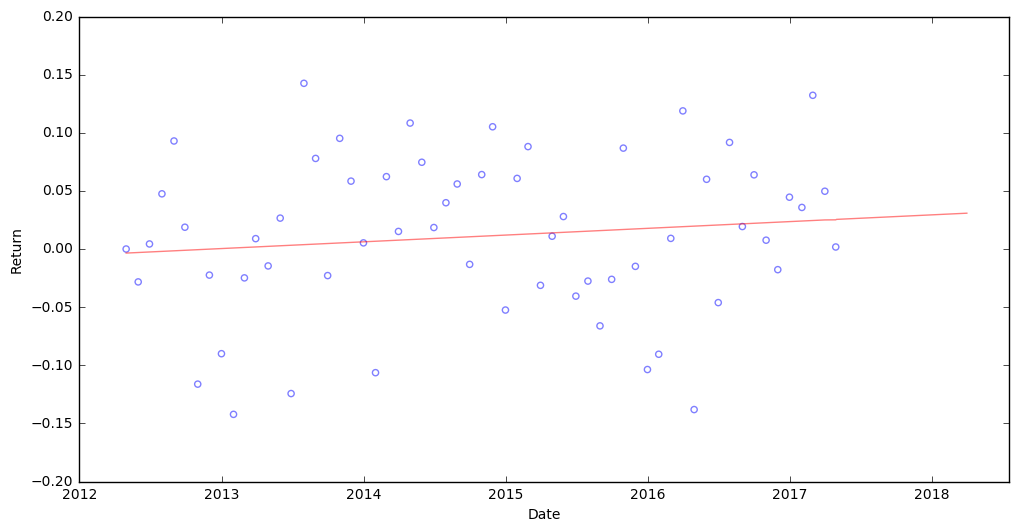

In [425]:
Xaaplpred_me = Xaapl_monthend.copy()
#print Xaaplpred.xs(datetime.date(2016, 1, 26))
daterange = pd.date_range(datetime.datetime.now(), datetime.datetime.now() + datetime.timedelta(days=365), freq='M')
for d in daterange:
    Xaaplpred_me.loc[d.date()]= [1,(d - datetime.datetime.strptime('2012-04-01',date_format)).days]
yaaplpred_me = estaaplreturn.predict(Xaaplpred_me)
scatter(aapl_returns.index,aapl_returns,marker='o',edgecolor='b',facecolor='none',alpha=0.5)
xlabel('Date')
ylabel('Return')
savefig('APPLE RETURN.png',fmt='png',dpi = 100)
plt.plot(Xaaplpred_me.index, yaaplpred_me, 'r', alpha=0.5)  # Add the regression line

In [426]:
# print aapl_returns
estmsftreturn = sm.OLS(msft_returns , Xmsft_monthend).fit()
# Check the results
estmsftreturn.summary()
#estaapl.params

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSFT   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.3706
Date:                Fri, 07 Apr 2017   Prob (F-statistic):              0.545
Time:                        03:08:20   Log-Likelihood:                 82.560
No. Observations:                  61   AIC:                            -161.1
Df Residuals:                      59   BIC:                            -156.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0051      0.016      0.308      0.759        -0.028     0.038
Rows        9.257e-06   1.52e-05      0.609      0.545     -2.12e-05  3.97e-05
==============================================================================
Omnibus:                       12.122   Durbin-Watson:                   2.435
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               15.103
Skew:                           0.785   Prob(JB):                     0.000525
Kurtosis:                       4.864   Cond. No.                     2.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

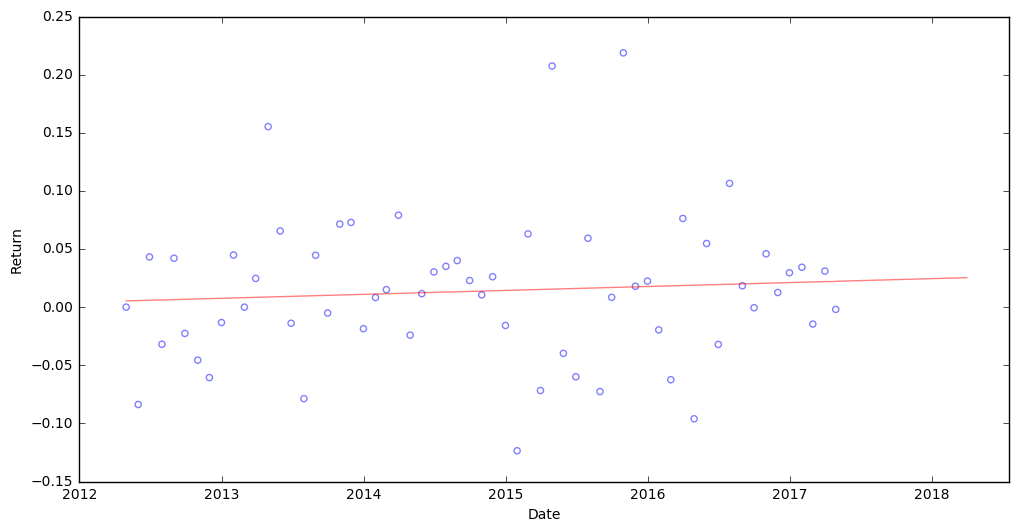

In [427]:
Xmsftpred_me = Xmsft_monthend.copy()
#print Xaaplpred.xs(datetime.date(2016, 1, 26))
daterange = pd.date_range(datetime.datetime.now(), datetime.datetime.now() + datetime.timedelta(days=365), freq='M')
for d in daterange:
    Xmsftpred_me.loc[d.date()]= [1,(d - datetime.datetime.strptime('2012-04-01',date_format)).days]
ymsftpred_me = estmsftreturn.predict(Xmsftpred_me)
scatter(msft_returns.index,msft_returns,marker='o',edgecolor='b',facecolor='none',alpha=0.5)
xlabel('Date')
ylabel('Return')
savefig('MICROSOFT RETURN.png',fmt='png',dpi = 100)
plt.plot(Xmsftpred_me.index, ymsftpred_me, 'r', alpha=0.5)  # Add the regression line

In [374]:
# concatenating all 4 time series into a datafame for further analysis
df_to_analyse = pd.concat([aapl_returns, msft_returns], join='outer', axis = 1)

In [375]:
# dropping first row with NAs
df_to_analyse.dropna()

,AAPL,MSFT
Date,,
2012-05-31,-0.028307,-0.083775
2012-06-29,0.004334,0.043168
2012-07-31,0.047465,-0.031932
2012-08-31,0.092917,0.042073
2012-09-28,0.018741,-0.022610
2012-10-31,-0.116238,-0.045605
2012-11-30,-0.022444,-0.060596
2012-12-31,-0.090055,-0.013269
2013-01-31,-0.142241,0.044826


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000026059EB8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002634D048>]], dtype=object)

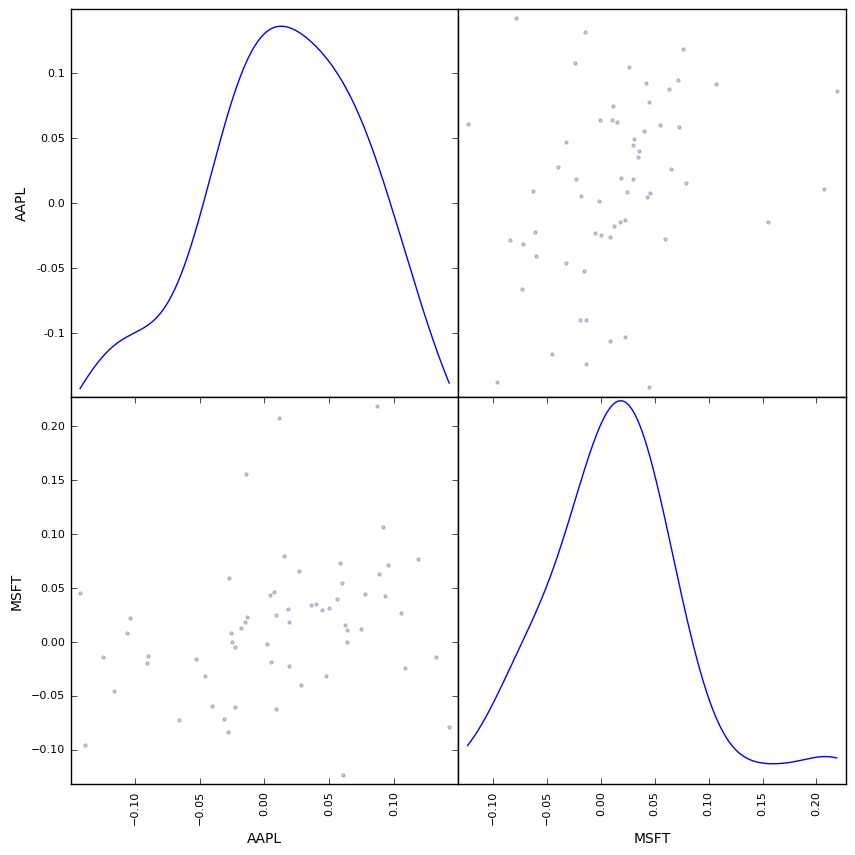

In [376]:
from pandas.tools.plotting import scatter_matrix

#Scatter plot matrix
scatter_matrix(df_to_analyse.dropna(), alpha=0.2, figsize=(10, 10), diagonal='kde')

In [46]:
# Any answer to this is right as long as the "why" makes sense.  Stocks with low or negative
# correlation but similar returns over the period would have made a good combination as they would
# provide equivalent return to one or the other but with less month-to-month variability and so, in
# a sense, less risk.  Note however that this doesn't really say anything about whether they will
# continue to be low- or anti-correlated in the future.

In [33]:
# Transpose the dataframe in preparation for plotting
df_to_analyse_t = df_to_analyse.T
df_to_analyse_t.dropna(axis=1,how='all')

Date,2012-05-31 00:00:00,2012-06-29 00:00:00,2012-07-31 00:00:00,2012-08-31 00:00:00,2012-09-28 00:00:00,2012-10-31 00:00:00,2012-11-30 00:00:00,2012-12-31 00:00:00,2013-01-31 00:00:00,2013-02-28 00:00:00,...,2016-07-29 00:00:00,2016-08-31 00:00:00,2016-09-30 00:00:00,2016-10-31 00:00:00,2016-11-30 00:00:00,2016-12-30 00:00:00,2017-01-31 00:00:00,2017-02-28 00:00:00,2017-03-31 00:00:00,2017-04-28 00:00:00
AAPL,-0.010787,0.010905,0.045787,0.089169,0.002841,-0.107555,-0.016931,-0.090779,-0.144041,-0.03089,...,0.090063,0.018136,0.065504,0.004334,-0.026599,0.047955,0.047747,0.128883,0.048690,0.000000
MSFT,-0.088382,0.047962,-0.036613,0.045809,-0.034393,-0.040995,-0.067274,0.003381,0.027705,0.01275,...,0.107680,0.013761,0.002436,0.040278,0.005674,0.031198,0.040393,-0.010363,0.029384,-0.001974


In [34]:
corr_plt = df_to_analyse_t.dropna(axis=1,how='all').values
corr_plt

array([[-0.0108,  0.0109,  0.0458,  0.0892,  0.0028, -0.1076, -0.0169,
        -0.0908, -0.144 , -0.0309,  0.0029,  0.0002,  0.0158, -0.1183,
         0.1412,  0.0766, -0.0214,  0.0963,  0.0639,  0.0089, -0.1078,
         0.0513,  0.02  ,  0.0994,  0.0727,  0.0276,  0.0287,  0.0722,
        -0.0171,  0.072 ,  0.1012, -0.0719,  0.0614,  0.0964, -0.0314,
         0.0058,  0.041 , -0.0373, -0.0328, -0.0704, -0.0218,  0.0834,
        -0.01  , -0.1102, -0.0752, -0.0067,  0.1272, -0.1399,  0.0653,
        -0.0427,  0.0901,  0.0181,  0.0655,  0.0043, -0.0266,  0.048 ,
         0.0477,  0.1289,  0.0487,  0.    ],
       [-0.0884,  0.048 , -0.0366,  0.0458, -0.0344, -0.041 , -0.0673,
         0.0034,  0.0277,  0.0128,  0.0288,  0.1573,  0.0544, -0.0103,
        -0.0782,  0.049 , -0.0036,  0.0637,  0.0771, -0.0189,  0.0115,
         0.0124,  0.07  , -0.0144,  0.0134,  0.0186,  0.035 ,  0.0526,
         0.0205,  0.0127,  0.0183, -0.0284, -0.1302,  0.0854, -0.0727,
         0.1963, -0.0366, -0.057

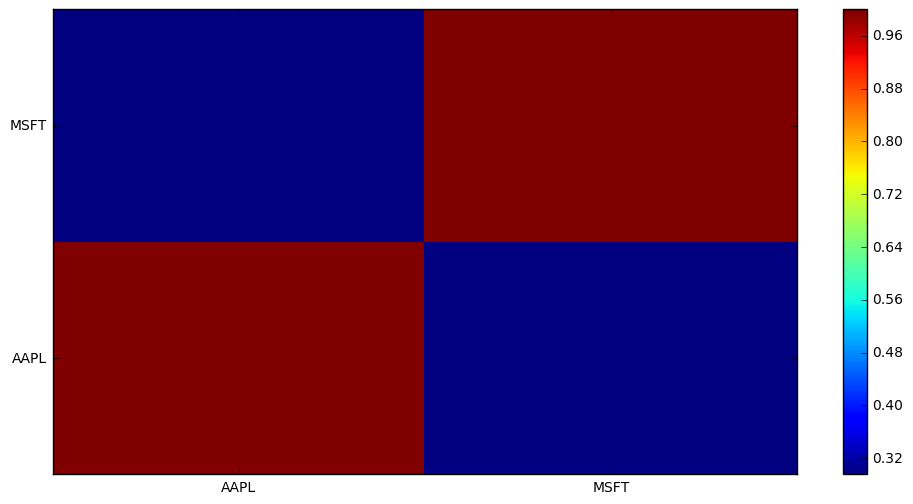

In [377]:
# Plot the correlation of the returns
from numpy import corrcoef, sum, log, arange
from pylab import pcolor, show, colorbar, xticks, yticks

R = corrcoef(corr_plt)
pcolor(R)
colorbar()
yticks(arange(0.5,2),['AAPL', 'MSFT'])
xticks(arange(0.5,2),['AAPL', 'MSFT'])
show()